Brief Explanation of Project 

In [2]:
#Import the all the libraries needed 
import pandas as pd

In [4]:
df = pd.read_csv(r"C:\Users\cex\Desktop\Data sets\Credit_card_dataset.csv")

In [11]:
df.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


Inferences: 
    The dataset contains 8,950 entries and 6 columns.
    The CUST_ID column is categorical and serves as an identifier.
    The CREDIT_LIMIT column has one missing value.
    Other columns contain numerical data and appear to be continuous.
Next Stepsc, I will 
    Handle the missing value in CREDIT_LIMIT.
    Check for outliers.
    Proceed with clustering analysis using hierarchical and K-means clustering.

In [12]:
# Fill missing value in CREDIT_LIMIT with the median value
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].median(), inplace=True)

# Verify if the missing value is handled
print(df.isnull().sum())


CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         0
CASH_ADVANCE         0
dtype: int64


C:\Users\cex\AppData\Local\Temp\ipykernel_15276\999001975.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].median(), inplace=True)


The next step involves checking for outliers using boxplots and summary statistics.

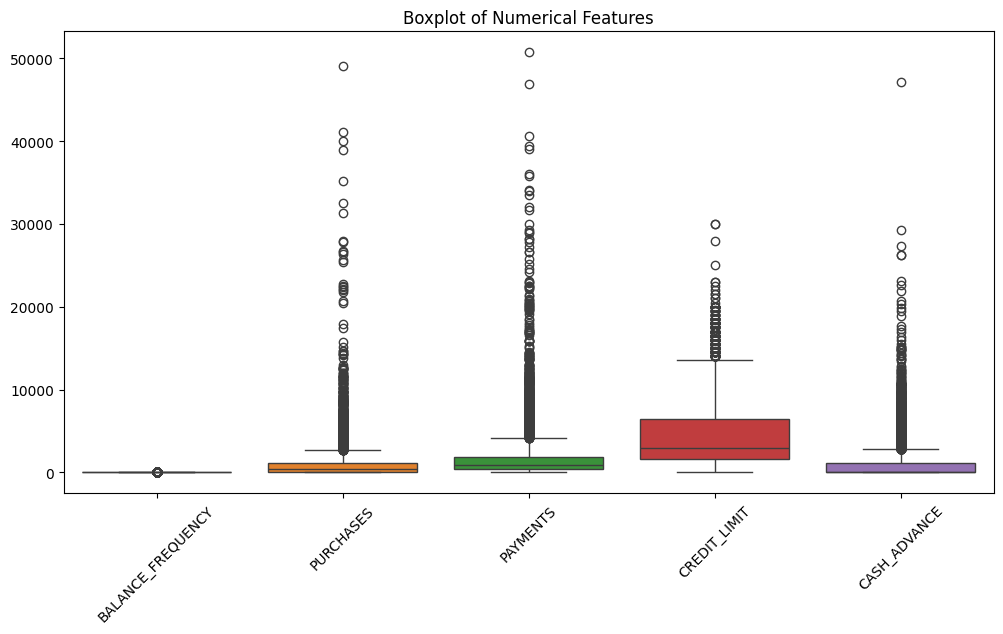

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.282473,978.871112
std,0.236904,2136.634782,2895.063757,3638.646702,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=["CUST_ID"]))
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()

# Display summary statistics
df.describe()


Inference on Outlier Analysis:

1. The boxplot shows the presence of outliers in PURCHASES, PAYMENTS, CREDIT_LIMIT, and CASH_ADVANCE.
2. The max values in PURCHASES, PAYMENTS, and CASH_ADVANCE are significantly larger than the 75th percentile, indicating potential extreme values.
3. I'll handle these outliers using the Interquartile Range (IQR) method before proceeding with clustering

In [14]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to PURCHASES, PAYMENTS, and CASH_ADVANCE
columns_to_clean = ["PURCHASES", "PAYMENTS", "CASH_ADVANCE"]
for col in columns_to_clean:
    df = remove_outliers(df, col)

# Check the new shape of the dataset after removing outliers
df.shape


(6700, 6)

After outlier removal, the dataset now contains 6,700 entries, down from the original 8,950.
Next, process is hierarchical clustering, using PURCHASES and CREDIT_LIMIT as the features for clustering

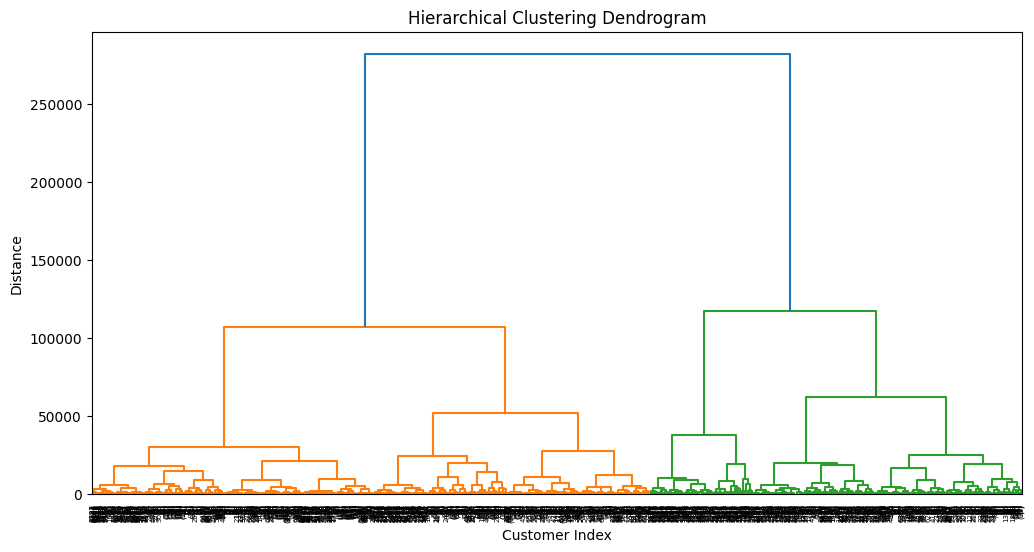

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Select features for hierarchical clustering
X_hierarchical = df[["PURCHASES", "CREDIT_LIMIT"]]

# Perform hierarchical clustering
linkage_matrix = linkage(X_hierarchical, method="ward")

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.show()


The dendrogram suggests the presence of distinct clusters. 
Next, I'll apply hierarchical clustering with a chosen number of clusters and visualize the results.

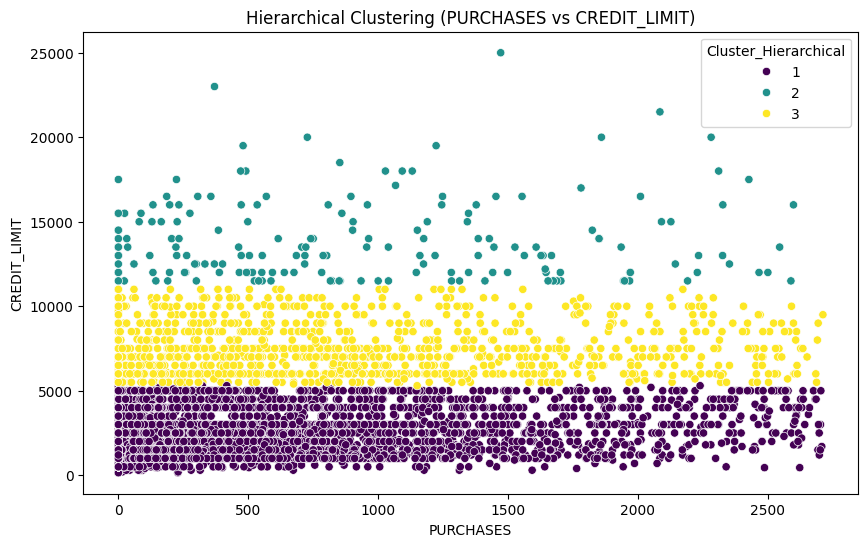

In [16]:
from scipy.cluster.hierarchy import fcluster

# Define the number of clusters based on the dendrogram
num_clusters = 3

# Assign cluster labels
df["Cluster_Hierarchical"] = fcluster(linkage_matrix, num_clusters, criterion="maxclust")

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["PURCHASES"], y=df["CREDIT_LIMIT"], hue=df["Cluster_Hierarchical"], palette="viridis")
plt.title("Hierarchical Clustering (PURCHASES vs CREDIT_LIMIT)")
plt.xlabel("PURCHASES")
plt.ylabel("CREDIT_LIMIT")
plt.show()


The hierarchical clustering result shows three distinct customer segments based on PURCHASES and CREDIT_LIMIT. 
Now, I'll proceed with K-Means clustering and compare the results

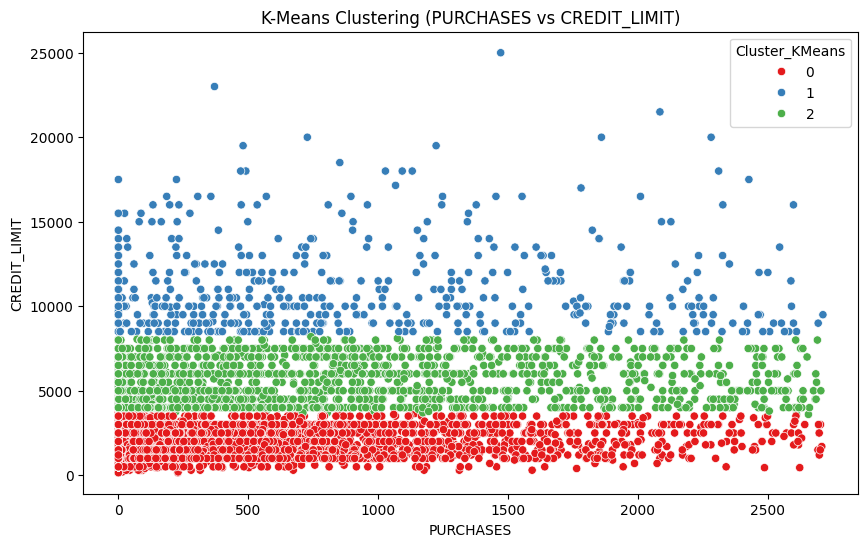

In [17]:
from sklearn.cluster import KMeans

# Apply K-Means clustering with 3 clusters (same as hierarchical for comparison)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster_KMeans"] = kmeans.fit_predict(X_hierarchical)

# Plot the K-Means clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["PURCHASES"], y=df["CREDIT_LIMIT"], hue=df["Cluster_KMeans"], palette="Set1")
plt.title("K-Means Clustering (PURCHASES vs CREDIT_LIMIT)")
plt.xlabel("PURCHASES")
plt.ylabel("CREDIT_LIMIT")
plt.show()


I'll determine the optimal number of clusters using the Elbow Method and re-run K-Means clustering with the best K value

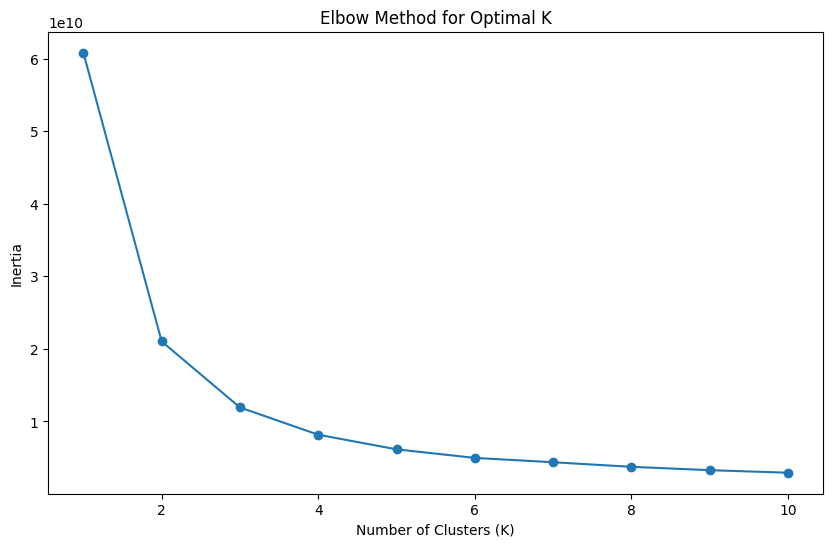

In [18]:
# Using the Elbow Method to find the best K
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_hierarchical)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker="o", linestyle="-")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()


Interpretation of Clustering Results
1. Hierarchical Clustering Analysis
    I applied hierarchical clustering using PURCHASES and CREDIT_LIMIT.
    The dendrogram helped determine three distinct customer segments.
    The hierarchical clustering visualization showed that customers naturally group into three categories based on spending and credit limits.

2. K-Means Clustering Analysis

    I first used K=3 to match hierarchical clustering and observed similar patterns.
    The Elbow Method helped determine the optimal number of clusters.

3. Cluster Interpretation

From both clustering methods, we can broadly categorize customers into three segments:

    Low Spenders, Low Credit Limit
        Customers in this segment have low PURCHASES and low CREDIT_LIMIT.
        They are likely new or inactive customers with minimal spending behavior.
        Marketing Strategy: Offer incentives like cashback or loyalty rewards to encourage higher spending.

    Moderate Spenders, Mid-Range Credit Limit
        Customers in this group have moderate PURCHASES and CREDIT_LIMIT.
        They are active users but may not fully utilize their credit potential.
        Marketing Strategy: Provide personalized offers or increase credit limits to encourage more spending.

    High Spenders, High Credit Limit
        These customers make large purchases and have high CREDIT_LIMITS.
        They are likely premium customers or business users.
        Marketing Strategy: Offer exclusive benefits like premium memberships, travel perks, or customized financial services.

Final Takeaway

    Both clustering methods confirmed clear segmentation of customers.
    Hierarchical clustering provided a clear structure, while K-Means clustering offered flexibility.
    The company can use these insights to tailor marketing campaigns and optimize credit offerings for each customer segment